In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn import manifold
from matplotlib import pyplot as plt
from tsne import bh_sne

In [22]:
with open('/Users/akumarmandapati/Downloads/labelDict.bin','rb') as fin :
    dd = pickle.load(fin)

In [672]:
attacList= list(dd.keys())

In [23]:
dd

{'DoS slowloris': ['Flow Duration',
  'Fwd IAT Min',
  'Bwd IAT Mean',
  'Fwd IAT Mean'],
 'SSH-Patator': ['Init_Win_bytes_forward',
  'Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'ACK Flag Count'],
 'DoS Slowhttptest': ['Flow Duration',
  'Active Min',
  'Active Mean',
  'Flow IAT Std'],
 'FTP-Patator': ['Init_Win_bytes_forward',
  'Fwd PSH Flags',
  'SYN Flag Count',
  'Fwd Packets/s'],
 'Heartbleed': ['Bwd Packet Length Std',
  'Subflow Fwd Bytes',
  'Flow Duration',
  'Total Length of Fwd Packets'],
 'Web-Attack': ['Init_Win_bytes_forward',
  'Subflow Fwd Bytes',
  'Init_Win_bytes_backward',
  'Total Length of Fwd Packets'],
 'DoS Hulk': ['Bwd Packet Length Std', 'Flow Duration', 'Flow IAT Std'],
 'Infiltration': ['Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'Flow Duration',
  'Active Mean'],
 'Bot': ['Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'Fwd Packet Length Mean',
  'Bwd Packets/s'],
 'DDoS': ['Bwd Packet Length Std',
  'Average Packet Size',

In [555]:
# save this in place of old dict
dd = {'DoS slowloris': ['Flow Duration',
  'Fwd IAT Min',
  'Bwd IAT Mean',
  'Fwd IAT Mean'],
 'SSH-Patator': ['Init_Win_bytes_forward',
  'Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'ACK Flag Count'],
 'DoS Slowhttptest': ['Flow Duration',
  'Active Min',
  'Active Mean',
  'Flow IAT Std'],
 'FTP-Patator': ['Init_Win_bytes_forward',
  'Fwd PSH Flags',
  'SYN Flag Count',
  'Fwd Packets/s'],
 'Heartbleed': ['Bwd Packet Length Std',
  'Subflow Fwd Bytes',
  'Flow Duration',
  'Total Length of Fwd Packets'],
 'Web-Attack': ['Init_Win_bytes_forward',
  'Subflow Fwd Bytes',
  'Init_Win_bytes_backward',
  'Total Length of Fwd Packets'],
 'DoS Hulk': ['Bwd Packet Length Std', 'Flow Duration', 'Flow IAT Std'],
 'Infiltration': ['Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'Flow Duration',
  'Active Mean'],
 'Bot': ['Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'Fwd Packet Length Mean',
  'Bwd Packets/s'],
 'DDoS': ['Bwd Packet Length Std',
  'Average Packet Size',
  'Flow Duration',
  'Flow IAT Std'],
 'PortScan': ['Init_Win_bytes_forward', 'Bwd Packets/s', 'PSH Flag Count'],
 'DoS GoldenEye': ['Bwd Packet Length Std',
  'Flow IAT Min',
  'Fwd IAT Min',
  'Flow IAT Mean']}

In [557]:
with open('/Users/akumarmandapati/Downloads/labelDict.bin','wb') as fin :
    pickle.dump(dd,fin,protocol=pickle.DEFAULT_PROTOCOL)

In [4]:
#only Attack dataset
attacks_df = pd.read_csv("attacks.csv" ,encoding='ISO-8859-1')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [869]:
alldf = pd.read_csv("Data-Final/attacks_now.csv" ,encoding='ISO-8859-1')

In [870]:
y_label_all = alldf.pop("Label") #Contains the label column

In [871]:
X_train, X_test, y_train, y_test = train_test_split(alldf,y_label_all, test_size=0.20, random_state=0,stratify=y_label_all)

In [872]:
X_test.columns

Index(['Fwd PSH Flags', 'Fwd IAT Mean', 'Fwd Packets/s', 'Flow IAT Min',
       'Init_Win_bytes_forward', 'Bwd Packet Length Std', 'ACK Flag Count',
       'Subflow Fwd Bytes', 'Average Packet Size', 'Fwd IAT Min',
       'Active Mean', 'Total Length of Fwd Packets', 'Fwd Packet Length Mean',
       'Bwd Packets/s', 'Init_Win_bytes_backward', 'Flow Duration',
       'Flow IAT Mean', 'Bwd IAT Mean', 'Active Min', 'Bwd Packet Length Min',
       'SYN Flag Count', 'PSH Flag Count', 'Flow IAT Std'],
      dtype='object')

In [873]:
y_test.value_counts()

DoS Hulk            46215
PortScan            31786
DDoS                 8367
DoS GoldenEye        2059
FTP-Patator          1588
SSH-Patator          1179
DoS slowloris        1159
DoS Slowhttptest     1100
BENIGN                580
Web-Attack            436
Bot                   393
Infiltration            7
Heartbleed              2
Name: Label, dtype: int64

In [15]:
attacks_f = pd.read_csv("attacks.csv" ,encoding='ISO-8859-1')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
attacks_f.nLabel.value_counts()

DoS Hulk            231073
PortScan            158930
DDoS                 41835
DoS GoldenEye        10293
FTP-Patator           7938
SSH-Patator           5897
DoS slowloris         5796
DoS Slowhttptest      5499
Web-Attack            2180
Bot                   1966
Infiltration            36
Heartbleed              11
Name: nLabel, dtype: int64

In [17]:
attacks_f = attacks_f[attacks_f.nLabel!=' Label']

In [19]:
#y_Label = attacks_df.pop("nLabel") #Contains the label column

y_label = attacks_f.pop("nLabel") #Contains the label column

In [602]:
y_Label.dtypes

dtype('O')

In [20]:
attacks_f.columns

Index(['Bwd Packets/s', 'Init_Win_bytes_backward', 'ACK Flag Count',
       'Total Length of Fwd Packets', 'Subflow Fwd Bytes',
       'Fwd Packet Length Mean', 'Flow IAT Min', 'Bwd IAT Mean',
       'Flow Duration', 'Flow IAT Std', 'Active Mean', 'Fwd PSH Flags',
       'Flow IAT Mean', 'Active Min', 'Bwd Packet Length Std',
       'Init_Win_bytes_forward', 'Average Packet Size', 'Fwd IAT Min',
       'SYN Flag Count', 'PSH Flag Count', 'Fwd IAT Mean', 'Fwd Packets/s'],
      dtype='object')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(attacks_f,y_label, test_size=0.20, random_state=0,stratify=y_label)

#X_train, X_test, y_train, y_test = train_test_split(final_df,y_label, test_size=0.10, random_state=0,stratify=y_label)

In [11]:
X_train.dtypes.eq(object)
c=X_train.columns[X_train.dtypes.eq(object)]
X_train[c]=X_train[c].apply(pd.to_numeric, errors='coerce', axis=0)
print(X_train.shape)

# Converting objects to numeric 
X_test.dtypes.eq(object)
c=X_test.columns[X_test.dtypes.eq(object)]
X_test[c]=X_test[c].apply(pd.to_numeric, errors='coerce', axis=0)
print(X_test.shape)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


(377163, 22)
(94291, 22)


In [851]:
X_train.to_csv("/Users/akumarmandapati/git/AIC/Data-Final/X_train_all_final.csv",index=None)
X_test.to_csv("/Users/akumarmandapati/git/AIC/Data-Final/X_test_all_final.csv",index=None)

In [852]:
y_train.to_csv("/Users/akumarmandapati/git/AIC/Data-Final/y_train_all_final.csv",index=None)
y_test.to_csv("/Users/akumarmandapati/git/AIC/Data-Final/y_test_all_final.csv",index=None)

In [12]:
y_test.value_counts()

DoS Hulk            46215
PortScan            31786
DDoS                 8367
DoS GoldenEye        2059
FTP-Patator          1588
SSH-Patator          1179
DoS slowloris        1159
DoS Slowhttptest     1100
Web-Attack            436
Bot                   393
Infiltration            7
Heartbleed              2
Name: nLabel, dtype: int64

In [607]:
#Encoding values for the labels being passed in the mainfunc
def encoder(x,y):
    if x==y : return 1
    else: return 0

In [608]:
def mainfunc(dd, X_train,y_train, X_test,y_test):
    for val in  list(dd.keys()): # For each attack type
        #print(val)
        cols = dd[val] # Important feature column for that attack type
        _df_train = X_train[cols]
        _df_test = X_test[cols]
        
        print("Train dataset",_df_train.shape)
        print("Test dataset",_df_test.shape)
        clf = RandomForestClassifier(max_depth=50,min_samples_leaf=3,n_estimators=400, random_state=0,class_weight='balanced',verbose=1, n_jobs= -1)
    
        y_tt = y_train.map(lambda x : encoder(x,val)).values
        trueLabel = y_test.map(lambda x : encoder(x,val)).values
        clf.fit(_df_train, y_tt)
        y_predict = clf.predict(_df_test)
       
        print(metrics.classification_report(trueLabel, y_predict))
        
        print("\n")
         
        with open(val+".bin","wb") as fout:
            pickle.dump(clf,fout,pickle.DEFAULT_PROTOCOL)
        print("done:",val) 
        
        df_class_report = pandas_classification_report(y_true=trueLabel, y_pred=y_predict)
        df_class_report.to_csv(val+".csv",  sep=',')
        print("Saving Classification Report for :",val)

In [1033]:
mainfunc(dd,X_train,y_train,X_test,y_test)

Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   38.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93132
          1       0.77      0.91      0.83      1159

avg / total       1.00      1.00      1.00     94291



done: DoS slowloris
Saving Classification Report for : DoS slowloris
Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   20.9s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93112
          1       0.98      0.99      0.98      1179

avg / total       1.00      1.00      1.00     94291



done: SSH-Patator
Saving Classification Report for : SSH-Patator
Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   37.8s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.9s finished


             precision    recall  f1-score   support

          0       1.00      0.99      1.00     93191
          1       0.62      0.92      0.75      1100

avg / total       0.99      0.99      0.99     94291



done: DoS Slowhttptest
Saving Classification Report for : DoS Slowhttptest
Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     92703
          1       0.89      0.99      0.93      1588

avg / total       1.00      1.00      1.00     94291



done: FTP-Patator
Saving Classification Report for : FTP-Patator
Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   10.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.3s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     94289
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00     94291



done: Heartbleed
Saving Classification Report for : Heartbleed
Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93855
          1       0.65      0.99      0.79       436

avg / total       1.00      1.00      1.00     94291



done: Web-Attack
Saving Classification Report for : Web-Attack
Train dataset (377163, 3)
Test dataset (94291, 3)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   43.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.8s finished


             precision    recall  f1-score   support

          0       0.99      0.98      0.98     48076
          1       0.98      0.99      0.98     46215

avg / total       0.98      0.98      0.98     94291



done: DoS Hulk
Saving Classification Report for : DoS Hulk
Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   22.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     94284
          1       1.00      0.57      0.73         7

avg / total       1.00      1.00      1.00     94291



done: Infiltration
Saving Classification Report for : Infiltration
Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   25.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93898
          1       0.98      0.99      0.99       393

avg / total       1.00      1.00      1.00     94291



done: Bot
Saving Classification Report for : Bot
Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   40.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85924
          1       1.00      1.00      1.00      8367

avg / total       1.00      1.00      1.00     94291



done: DDoS
Saving Classification Report for : DDoS
Train dataset (377163, 3)
Test dataset (94291, 3)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   22.9s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     62505
          1       1.00      1.00      1.00     31786

avg / total       1.00      1.00      1.00     94291



done: PortScan
Saving Classification Report for : PortScan
Train dataset (377163, 4)
Test dataset (94291, 4)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   31.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     92232
          1       0.93      0.99      0.96      2059

avg / total       1.00      1.00      1.00     94291



done: DoS GoldenEye
Saving Classification Report for : DoS GoldenEye


In [205]:
def tsneplot(data,truelabel,predicted_label):
        tsne = manifold.TSNE(init='random', random_state=0, perplexity=50,n_iter=1500,verbose=1)
        vis_data_test = tsne.fit_transform(_df_test)
        
        %matplotlib inline
        target_ids = range(0,2)
        font_size = 10
        plt.figure(figsize=(10,10))
        
        colors = 'r', 'b'
        for i, c, label in zip(target_ids, colors, [_ for _ in target_ids]):
            plt.scatter(vis_data_test[trueLabel==i, 0], vis_data_test[trueLabel==i, 1], c=c, label=label,s=1.5)
        plt.title("True Label Binary-Attacks Distribution", fontsize=font_size,loc="center")
        plt.xlabel("Dimension 1", fontsize=font_size)
        plt.ylabel("Dimension 2", fontsize=font_size)
        plt.legend(loc=1,fontsize =font_size,bbox_to_anchor=(1.05, 1,), borderaxespad=-3.3)
        plt.savefig(val+"_True.eps",format='eps',dpi=1000)
        
        for i, c, label in zip(target_ids, colors, [_ for _ in target_ids]):
            plt.scatter(vis_data_test[y_predict==i, 0], vis_data_test[y_predict==i, 1], c=c, label=label,s=1.5)
        plt.title("Predicted Label Binary-Attacks Distribution", fontsize=font_size,loc="center")
        plt.xlabel("Dimension 1", fontsize=font_size)
        plt.ylabel("Dimension 2", fontsize=font_size)
        plt.legend(loc=1,fontsize =font_size,bbox_to_anchor=(1.05, 1,), borderaxespad=-3.3)
        plt.savefig(val+"_Predicted.eps",format='eps',dpi=1000)

In [10]:
#Creating a classfication Report
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['avg / total'] = avg

    return class_report_df.T

In [ ]:
final_df.Label.value_counts()

In [1030]:
dd

{'DoS slowloris': ['Flow Duration',
  'Fwd IAT Min',
  'Bwd IAT Mean',
  'Fwd IAT Mean'],
 'SSH-Patator': ['Init_Win_bytes_forward',
  'Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'ACK Flag Count'],
 'DoS Slowhttptest': ['Flow Duration',
  'Active Min',
  'Active Mean',
  'Flow IAT Std'],
 'FTP-Patator': ['Init_Win_bytes_forward',
  'Fwd PSH Flags',
  'SYN Flag Count',
  'Fwd Packets/s'],
 'Heartbleed': ['Bwd Packet Length Std',
  'Subflow Fwd Bytes',
  'Flow Duration',
  'Total Length of Fwd Packets'],
 'Web-Attack': ['Init_Win_bytes_forward',
  'Subflow Fwd Bytes',
  'Init_Win_bytes_backward',
  'Total Length of Fwd Packets'],
 'DoS Hulk': ['Bwd Packet Length Std', 'Flow Duration', 'Flow IAT Std'],
 'Infiltration': ['Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'Flow Duration',
  'Active Mean'],
 'Bot': ['Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'Fwd Packet Length Mean',
  'Bwd Packets/s'],
 'DDoS': ['Bwd Packet Length Std',
  'Average Packet Size',

# Benign vs Attacks combined

In [867]:
#create a dict n assign class name as key , value is the obj of model
ba_df = pd.read_csv("benignattacks.csv" ,encoding='ISO-8859-1')

In [868]:
ba_df.Label.unique()

array([1, 0])

In [822]:
ba_y_Label = ba_df.pop("Label") #Contains the label column

In [823]:
# Test vs Train split
ba_X_train, ba_X_test, ba_y_train, ba_y_test = train_test_split(ba_df,ba_y_Label, test_size=0.20, random_state=0,stratify=ba_y_Label)

In [698]:
np.unique(ba_y_train)

array([0, 1])

In [696]:
np.nunique(ba_y_test)

array([0, 1])

In [824]:
# Converinting objects.
ba_X_train.dtypes.eq(object)
c=ba_X_train.columns[ba_X_train.dtypes.eq(object)]
ba_X_train[c]=ba_X_train[c].apply(pd.to_numeric, errors='coerce', axis=0)
#ba_X_train.shape

# Converting objects to numeric 
ba_X_test.dtypes.eq(object)
c=ba_X_test.columns[ba_X_test.dtypes.eq(object)]
ba_X_test[c]=ba_X_test[c].apply(pd.to_numeric, errors='coerce', axis=0)
#ba_X_test.shape

In [656]:
# Saving values of X and Y
ba_X_train.to_csv("ba_X_train.csv",index=None)
ba_X_test.to_csv("ba_X_test.csv",index=None)

In [657]:
ba_y_train.to_csv("ba_y_train.csv",index=None)
ba_y_test.to_csv("ba_y_test.csv",index=None)

In [825]:
clf_ba_rf = RandomForestClassifier(max_depth=50, random_state=0,n_estimators=250,n_jobs=-1,verbose=1)

In [826]:
clf_ba_rf.fit(ba_X_train,ba_y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=0, verbose=1, warm_start=False)

In [827]:
with open("BENIGN.bin","wb") as fout:
            pickle.dump(clf,fout,pickle.DEFAULT_PROTOCOL)

In [894]:
cols_n = ['Bwd Packet Length Min', 'Subflow Fwd Bytes',
       'Total Length of Fwd Packets', 'Fwd Packet Length Mean']

In [895]:
y_predict_rf = clf_ba_rf.predict(X_test[cols_n])

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.7s finished


In [896]:
print(metrics.classification_report(y_test,y_predict_rf))

ValueError: Mix of label input types (string and number)

In [716]:
from sklearn.metrics import accuracy_score
print(metrics.precision_score(ba_y_test,y_predict_rf,average="macro"))

0.08327401443789532


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [711]:
print(metrics.recall_score(ba_y_test,y_predict_ba,average="macro"))

0.5


In [688]:
print(metrics.f1_score(ba_y_test,y_predict_ba,average="macro"))

0.14276997153412876


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [661]:
with open("benginvsattacks.bin","wb") as fout:
            pickle.dump(clf,fout,pickle.DEFAULT_PROTOCOL)

In [667]:
dd = {'benginvsattacks':['Bwd Packet Length Min', 'Subflow Fwd Bytes',
       'Total Length of Fwd Packets', 'Fwd Packet Length Mean']}

In [857]:
dd['BENIGN'] = ['Bwd Packet Length Min', 'Subflow Fwd Bytes',
       'Total Length of Fwd Packets', 'Fwd Packet Length Mean']

In [858]:
# Save this Dict
dd

{'DoS slowloris': ['Flow Duration',
  'Fwd IAT Min',
  'Bwd IAT Mean',
  'Fwd IAT Mean'],
 'SSH-Patator': ['Init_Win_bytes_forward',
  'Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'ACK Flag Count'],
 'DoS Slowhttptest': ['Flow Duration',
  'Active Min',
  'Active Mean',
  'Flow IAT Std'],
 'FTP-Patator': ['Init_Win_bytes_forward',
  'Fwd PSH Flags',
  'SYN Flag Count',
  'Fwd Packets/s'],
 'Heartbleed': ['Bwd Packet Length Std',
  'Subflow Fwd Bytes',
  'Flow Duration',
  'Total Length of Fwd Packets'],
 'Web-Attack': ['Init_Win_bytes_forward',
  'Subflow Fwd Bytes',
  'Init_Win_bytes_backward',
  'Total Length of Fwd Packets'],
 'DoS Hulk': ['Bwd Packet Length Std', 'Flow Duration', 'Flow IAT Std'],
 'Infiltration': ['Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'Flow Duration',
  'Active Mean'],
 'Bot': ['Subflow Fwd Bytes',
  'Total Length of Fwd Packets',
  'Fwd Packet Length Mean',
  'Bwd Packets/s'],
 'DDoS': ['Bwd Packet Length Std',
  'Average Packet Size',

In [810]:
attacks_f.columns

Index(['Bwd Packets/s', 'Init_Win_bytes_backward', 'ACK Flag Count',
       'Total Length of Fwd Packets', 'Subflow Fwd Bytes',
       'Fwd Packet Length Mean', 'Flow IAT Min', 'Bwd IAT Mean',
       'Flow Duration', 'Flow IAT Std', 'Active Mean', 'Fwd PSH Flags',
       'Flow IAT Mean', 'Active Min', 'Bwd Packet Length Std',
       'Init_Win_bytes_forward', 'Average Packet Size', 'Fwd IAT Min',
       'SYN Flag Count', 'PSH Flag Count', 'Fwd IAT Mean', 'Fwd Packets/s'],
      dtype='object')

# Global Test 

In [902]:
global_test = pd.read_csv("Data-Final/X_test_all_final.csv" ,encoding='ISO-8859-1')

In [935]:
refined_global_X_test = pd.read_csv("/Users/akumarmandapati/git/AIC/Data-Final/global_X_test.csv",encoding='ISO-8859-1')

In [1004]:
refined_global_X_test.shape

(283075, 23)

In [998]:
refined_global_X_train = pd.read_csv("/Users/akumarmandapati/git/AIC/Data-Final/global_X_train.csv",encoding='ISO-8859-1')

In [1005]:
refined_global_X_train.shape

(2547668, 23)

In [1001]:
refined_global_y_test = pd.Series(pd.read_csv("/Users/akumarmandapati/git/AIC/Data-Final/global_y_test_1.csv",encoding='ISO-8859-1'))

In [1006]:
refined_global_y_test.shape

(283075,)

In [1002]:
refined_global_y_train = pd.Series(pd.read_csv("/Users/akumarmandapati/git/AIC/Data-Final/global_y_train.csv",encoding='ISO-8859-1'))

In [1007]:
refined_global_y_train.shape

(2547667,)

In [ ]:
pd.Series(pd.read_csv)

In [938]:
refined_global_y_test.shape

(283074, 1)

In [963]:
refined_global_y_test_1.shape

(283075, 1)

In [952]:
refined_global_y_test.BENIGN.value_counts()

BENIGN              235928
DoS Hulk             23107
PortScan             15893
DDoS                  4183
DoS GoldenEye         1029
FTP-Patator            794
SSH-Patator            590
DoS slowloris          580
DoS Slowhttptest       550
Web-Attack             218
Bot                    197
Infiltration             4
Heartbleed               1
Name: BENIGN, dtype: int64

In [953]:
df_prob.Label.value_counts()

BENIGN              175963
DoS Hulk             39508
PortScan             22291
DDoS                 14436
Web-Attack            8670
Bot                   7852
FTP-Patator           5227
DoS GoldenEye         4705
DoS Slowhttptest      1989
DoS slowloris         1475
SSH-Patator            950
Infiltration             8
Heartbleed               1
Name: Label, dtype: int64

In [959]:
df_prob.shape

(283075, 14)

In [960]:
refined_global_y_test.BENIGN.value_counts()

BENIGN              235928
DoS Hulk             23107
PortScan             15893
DDoS                  4183
DoS GoldenEye         1029
FTP-Patator            794
SSH-Patator            590
DoS slowloris          580
DoS Slowhttptest       550
Web-Attack             218
Bot                    197
Infiltration             4
Heartbleed               1
Name: BENIGN, dtype: int64

In [957]:
a = 235928+23107+15893+4183+1029+794+590+580+550+218+197+4+1 
print (a)

283074


In [936]:
refined_global_X_test.shape

(283075, 23)

In [974]:
global_test.head()

dd["Heartbleed"]

['Bwd Packet Length Std',
 'Subflow Fwd Bytes',
 'Flow Duration',
 'Total Length of Fwd Packets']

In [25]:
# Make changes to function to take in Benign model as well -> push some records of Benign to dataset
#Probability per model
def loadmodel():
    probability_dict = {}
    for val in  list(dd.keys()):
        cols = dd[val]
        _df_test = X_test[cols]
        #print(val)
        #Load the model from disk
        loaded_model = pickle.load(open(val+'.bin', 'rb'))
        a = loaded_model.predict_proba(_df_test)
        #print(a)
        
        b = a[:,1]
        #d = a[:,0]
        c = b.flatten()
        print(val)
        probability_dict[val]=c
        
    with open("probability_dict.p","wb") as fout:
            pickle.dump(probability_dict,fout,pickle.DEFAULT_PROTOCOL)

In [26]:
loadmodel()

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


DoS slowloris


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


SSH-Patator


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


DoS Slowhttptest


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


FTP-Patator


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.3s finished


Heartbleed


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished


Web-Attack


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


DoS Hulk


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Infiltration


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


Bot


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished


DDoS


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


PortScan


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s


DoS GoldenEye


[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.5s finished


In [27]:
# Dataframe containing the probabilities of all 12 models
with open("probability_dict.p","rb") as fin:
    prob_dict = pickle.load(fin)

In [28]:
#Creating a dataframe of the probabilities
df_prob = pd.DataFrame(prob_dict)

In [29]:
df_prob.head(5)

,Bot,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,Heartbleed,Infiltration,PortScan,SSH-Patator,Web-Attack
0,0.0,0.0,0.000000,0.999998,0.0,0.00000,0.0,0.0,0.0,0.000012,0.0,0.0
1,0.0,0.0,0.000245,0.999033,0.0,0.00000,0.0,0.0,0.0,0.000021,0.0,0.0
2,0.0,0.0,0.000000,0.001265,0.0,0.26975,0.0,0.0,0.0,0.999998,0.0,0.0
3,0.0,1.0,0.000105,0.000215,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.992948,0.0,0.00000,0.0,0.0,0.0,0.000021,0.0,0.0


In [30]:
# adding label column to the DF  based on max value ( First Occurance)
df_prob['Label'] = df_prob.idxmax(axis=1)

In [34]:
predictDict

{'DoS slowloris': 0,
 'SSH-Patator': 1,
 'DoS Slowhttptest': 2,
 'FTP-Patator': 3,
 'Heartbleed': 4,
 'Web-Attack': 5,
 'DoS Hulk': 6,
 'Infiltration': 7,
 'Bot': 8,
 'DDoS': 9,
 'PortScan': 10,
 'DoS GoldenEye': 11}

In [33]:
predictDict = {k:v for k,v in  zip(list(dd.keys()),[_ for _ in range(len(dd))])}

In [1094]:
predictDict

{'DoS slowloris': 0,
 'SSH-Patator': 1,
 'DoS Slowhttptest': 2,
 'FTP-Patator': 3,
 'Heartbleed': 4,
 'Web-Attack': 5,
 'DoS Hulk': 6,
 'Infiltration': 7,
 'Bot': 8,
 'DDoS': 9,
 'PortScan': 10,
 'DoS GoldenEye': 11}

In [35]:
y_test.value_counts()

DoS Hulk            46215
PortScan            31786
DDoS                 8367
DoS GoldenEye        2059
FTP-Patator          1588
SSH-Patator          1179
DoS slowloris        1159
DoS Slowhttptest     1100
Web-Attack            436
Bot                   393
Infiltration            7
Heartbleed              2
Name: nLabel, dtype: int64

In [36]:
#predictDict = {k:v for k,v in  zip(list(dd.keys()),[_ for _ in range(len(dd))])}
y_prd_after_encoding = df_prob.Label.map(lambda x : predictDict[x]) # From predictions
y_test_after_encoding = y_test.map(lambda x : predictDict[x])
# Save these for Tsne vis

In [37]:
y_prd_after_encoding.shape

(94291,)

In [38]:
y_test_after_encoding.shape

(94291,)

In [1053]:
from sklearn.metrics import accuracy_score
print(metrics.precision_score(y_test_after_encoding,y_prd_after_encoding,average="weighted"))

0.9931684447650702


In [1054]:
print(metrics.recall_score(y_test_after_encoding,y_prd_after_encoding,average="weighted"))

0.9926716229544708


In [1055]:
print(metrics.f1_score(y_test_after_encoding,y_prd_after_encoding,average="weighted"))

0.9927968149589598


In [1056]:
print(metrics.classification_report(y_test_after_encoding,y_prd_after_encoding))

             precision    recall  f1-score   support

          0       0.98      0.93      0.96      1159
          1       0.95      1.00      0.97      1179
          2       0.91      0.93      0.92      1100
          3       0.92      0.99      0.95      1588
          4       1.00      1.00      1.00         2
          5       0.75      0.99      0.86       436
          6       1.00      1.00      1.00     46215
          7       0.80      0.57      0.67         7
          8       0.99      0.99      0.99       393
          9       1.00      0.99      1.00      8367
         10       1.00      0.99      1.00     31786
         11       0.99      0.96      0.97      2059

avg / total       0.99      0.99      0.99     94291



In [641]:
y_prd_after_encoding.to_csv("y_prd_after_encoding.csv",index=None)
y_test_after_encoding.to_csv("y_test_after_encoding.csv",index=None)

In [1063]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [27]:
vis_cols = ['Bwd Packets/s', 'Init_Win_bytes_backward',
       'Total Length of Fwd Packets', 'Subflow Fwd Bytes',
       'Fwd Packet Length Mean', 'Flow IAT Min', 'Bwd IAT Mean',
       'Flow Duration', 'Flow IAT Std', 'Active Mean',
       'Flow IAT Mean', 'Active Min', 'Bwd Packet Length Std',
       'Init_Win_bytes_forward', 'Average Packet Size', 'Fwd IAT Min', 'Fwd IAT Mean', 'Fwd Packets/s']

In [28]:
X_test_vis = X_test[vis_cols]

In [29]:
X_test_vis.head(5)

,Bwd Packets/s,Init_Win_bytes_backward,Total Length of Fwd Packets,Subflow Fwd Bytes,Fwd Packet Length Mean,Flow IAT Min,Bwd IAT Mean,Flow Duration,Flow IAT Std,Active Mean,Flow IAT Mean,Active Min,Bwd Packet Length Std,Init_Win_bytes_forward,Average Packet Size,Fwd IAT Min,Fwd IAT Mean,Fwd Packets/s
357241,0.071071,235,306,306,51.000000,1,16400000.0,98493700,28400000.00,13016.0,8207808.333,13016,2425.837852,0,915.923077,1,19700000.0,0.060918
388164,0.071234,235,364,364,40.444444,0,34695.6,84229113,22500000.00,2984.0,6016365.214,2984,2181.008184,251,797.266667,0,10500000.0,0.106851
194162,43478.260870,0,2,2,2.000000,23,0.0,23,0.00,0.0,23.000,0,0.000000,1024,5.000000,0,0.0,43478.260870
34166,0.000000,-1,30,30,6.000000,1,0.0,11020714,5508842.36,2272.0,2755178.500,2272,0.000000,256,7.200000,1,2755178.5,0.453691
340523,0.075423,235,312,312,44.571429,1,36895.5,66292714,19900000.00,5.0,6026610.364,5,3003.171157,251,992.250000,1,11000000.0,0.105592


In [1078]:
# TSNE Visualization 
tsne = TSNE(n_jobs=8,n_iter=5000,verbose=1,perplexity=50)
tsne_plot_vis = tsne.fit_transform(X_test_vis)

In [1080]:
tsne_plot_vis.shape

(94291, 2)

In [1082]:
import matplotlib.cm as cm

In [44]:
%matplotlib inline
def plot(tsne_resultsRfPred,labelss,str):
   target_ids = range(0,12)
   #target_ids = range(0,2)
   font_size = 10
   Label=['Benign','Attack']
   from matplotlib import pyplot as plt
   #plt.figure(figsize=(6, 5))
   plt.figure(figsize=(10,10))
   x = np.arange(13)
   ys = [i+x+(i*x)**2 for i in range(13)]
   #colors = cm.rainbow(np.linspace(0, 1, len(ys)))
   colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple','dimgray','rosybrown','firebrick'#,'maroon','khaki','indigo'
   #colors = 'r', 'g'
   for i, c, label in zip(target_ids, colors, [_ for _ in target_ids]):
       plt.scatter(tsne_resultsRfPred[labelss==i, 0], tsne_resultsRfPred[labelss==i, 1], c=c, label=label,s=3,edgecolors='face')
   plt.title(str, fontsize=font_size,loc="center")
   plt.xlabel("Dimension 1", fontsize=font_size)
   plt.ylabel("Dimension 2", fontsize=font_size)
   plt.legend(loc=1,fontsize =font_size,bbox_to_anchor=(1.05, 1,), borderaxespad=-3.3)
   #plt.savefig(str+"_Tsne.eps",format='eps',dpi=1000)

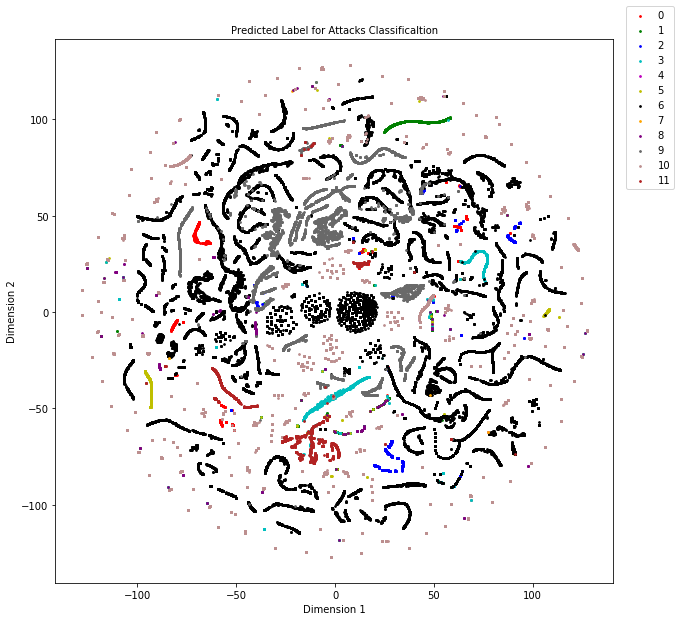

In [45]:
plot(tt,y_prd_after_encoding,'Predicted Label for Attacks Classificaltion')

In [13]:
with open("tsne_vis_5k.bin","wb") as fout:
            pickle.dump(tsne_plot_vis,fout,pickle.DEFAULT_PROTOCOL)

NameError: name 'tsne_plot_vis' is not defined

In [5]:
from sklearn.externals import joblib

In [7]:
pickle_off = open("tsne_vis_5k.bin","rb")

In [1096]:
tsne = TSNE(n_jobs=8,n_iter=5000,verbose=1,perplexity=100)
tsne_plot_vis_final = tsne.fit_transform(X_test_vis)

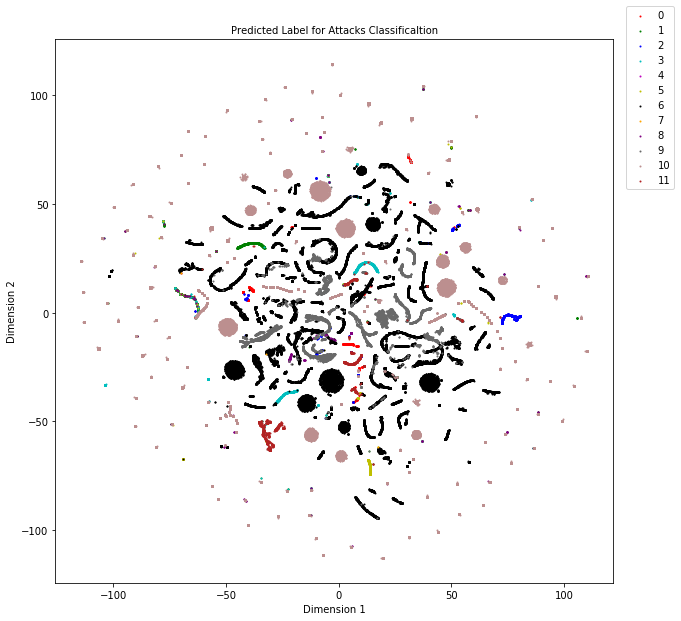

In [1102]:
plot(tsne_plot_vis_final,y_prd_after_encoding,'Predicted Label for Attacks Classificaltion')

In [24]:
# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
RS = 20150101

In [33]:
tsne_transform = TSNE(random_state=RS,verbose=1).fit_transform(X_test_vis)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 94291 samples in 0.707s...
[t-SNE] Computed neighbors for 94291 samples in 13.426s...
[t-SNE] Computed conditional probabilities for sample 1000 / 94291
[t-SNE] Computed conditional probabilities for sample 2000 / 94291
[t-SNE] Computed conditional probabilities for sample 3000 / 94291
[t-SNE] Computed conditional probabilities for sample 4000 / 94291
[t-SNE] Computed conditional probabilities for sample 5000 / 94291
[t-SNE] Computed conditional probabilities for sample 6000 / 94291
[t-SNE] Computed conditional probabilities for sample 7000 / 94291
[t-SNE] Computed conditional probabilities for sample 8000 / 94291
[t-SNE] Computed conditional probabilities for sample 9000 / 94291
[t-SNE] Computed conditional probabilities for sample 10000 / 94291
[t-SNE] Computed conditional probabilities for sample 11000 / 94291
[t-SNE] Computed conditional probabilities for sample 12000 / 94291
[t-SNE] Computed conditional probabilities for sa

TypeError: _gradient_descent() got an unexpected keyword argument 'n_iter_check'

In [31]:
# This list will contain the positions of the map points at every iteration.
positions = []
def _gradient_descent(objective, p0, it, n_iter, n_iter_without_progress=30,
                      momentum=0.5, learning_rate=1000.0, min_gain=0.01,
                      min_grad_norm=1e-7, min_error_diff=1e-7, verbose=0,
                      args=[]):
    # The documentation of this function can be found in scikit-learn's code.
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = 0

    for i in range(it, n_iter):
        # We save the current position.
        positions.append(p.copy())

        new_error, grad = objective(p, *args)
        error_diff = np.abs(new_error - error)
        error = new_error
        grad_norm = linalg.norm(grad)

        if error < best_error:
            best_error = error
            best_iter = i
        elif i - best_iter > n_iter_without_progress:
            break
        if min_grad_norm >= grad_norm:
            break
        if min_error_diff >= error_diff:
            break

        inc = update * grad >= 0.0
        dec = np.invert(inc)
        gains[inc] += 0.05
        gains[dec] *= 0.95
        np.clip(gains, min_gain, np.inf)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

    return p, error, i

In [32]:
sklearn.manifold.t_sne._gradient_descent = _gradient_descent

In [11]:
with open("tsne_vis_5k.bin","rb") as  fout:
    tsne = pickle.load(fout)

EOFError: Ran out of input

In [12]:
tt = np.load("tsne.npy")

In [14]:
tt.shape

(94291, 2)

In [66]:
tt[:,0].shape

(94291,)

In [47]:
y_test.shape

(94291,)

In [48]:
y_test[:10]

357241    DoS Hulk
388164    DoS Hulk
194162    PortScan
34166         DDoS
340523    DoS Hulk
188453    PortScan
108183    PortScan
192246    PortScan
287555    DoS Hulk
311024    DoS Hulk
Name: nLabel, dtype: object

In [51]:
distintY = y_test.unique().tolist()

In [52]:
distintY

['DoS Hulk',
 'PortScan',
 'DDoS',
 'FTP-Patator',
 'DoS GoldenEye',
 'DoS slowloris',
 'Web-Attack',
 'Bot',
 'DoS Slowhttptest',
 'SSH-Patator',
 'Heartbleed',
 'Infiltration']

In [79]:
colors = ['aliceblu','antiquewhite', 'aqua', 'aquamarine', 'azure',
            'beige', 'bisque', 'black', 'blanchedalmond', 'blue',
            'blueviolet', 'brown']

In [115]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [122]:

# df contains your tsne result where "class" is the column consisting of your class assignment  

trace0 = go.scattergl(
    x = tt[:,0],  
    y = tt[:,1],
    #x = tt[y_test=="DoS Hulk", 0],
    #y = tt[y_test=="DoS Hulk", 1],
    mode = 'markers',
    name = 't-SNE',
    marker = dict(size= 2.0,  color= y_prd_after_encoding ,colorbar = dict(title = 'Classes'), colorscale = 'Jet'), text='Test')


fig = {
    'data': [trace0]
}

#Offline Plot

plot(fig, filename = 'tsne.html')

TypeError: 'module' object is not callable

In [138]:
# df contains your tsne result where "class" is the column consisting of your class assignment  

trace0 = go.Scattergl(
   x = tt[:,0],  
   y = tt[:,1],
   #x = tt[y_test=="DoS Hulk", 0],
   #y = tt[y_test=="DoS Hulk", 1],
   mode = 'markers',
   #name = 't-SNE',
   marker = dict(size= 5.0,  color=y_test_after_encoding ,colorbar = dict(title = 'Classes'), colorscale = 'Jet'),     
   text=y_test_after_encoding)

fig = {
   'data': [trace0]
}

#Offline Plot

plot(fig, filename = 'tsne-True.html')

'file:///Users/akumarmandapati/git/AIC/tsne-True.html'

In [137]:
# df contains your tsne result where "class" is the column consisting of your class assignment  

trace0 = go.Scattergl(
   x = tt[:,0],  
   y = tt[:,1],
   #x = tt[y_test=="DoS Hulk", 0],
   #y = tt[y_test=="DoS Hulk", 1],
   mode = 'markers',
   #name = 't-SNE',
   marker = dict(size= 5.0,  color=y_prd_after_encoding ,colorbar = dict(title = 'Classes'), colorscale = 'Jet'),     
   text=y_prd_after_encoding)

fig = {
   'data': [trace0]
}

#Offline Plot

plot(fig, filename = 'tsne-Prediction.html')

'file:///Users/akumarmandapati/git/AIC/tsne-Prediction.html'